# Importing and Loading

### Importing relevant libs

In [13]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

import scipy.stats as st

%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

### Reading datasets

In [59]:
data_bank = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=";")
X = data_bank.loc[:, data_bank.columns != 'y']
y = data_bank.loc[:, 'y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

# Exploration

### Exploration pipeline

In [3]:
class ExploreData():
    '''Print info, head, shape, missing values of a dataset
    Parameter:
        data DataFrame: pandas dataframe
    '''
    
    def __init__(self, data):
        self.data = data
    
    def __str__(self):
        self.summary()
        return ''
    
    def data(self):
        '''Return the dataset of current instance'''
        return self.data
    
    def summary(self):
        '''print summary of the dataset'''
        self.info()
        self.divider()
        self.head()
        self.divider()
        self.shape()
        self.divider()
        self.missing_values()
    
    def divider(self):
        '''print a horzontal line'''
        display(Markdown('---'))
    
    def info(self):
        '''print a concise summary of a DataFrame'''
        print('\nDataframe summary')
        display(self.data.info())

    def head(self, n=5):
        '''print out the first 5 rows of a dataframe'''
        print('\nFirst 5 rows')
        display(self.data.head(n))

    def shape(self):
        '''print out shape of a dataframe'''
        print('\nShape of the dataset')
        display(self.data.shape)

    def missing_values(self):
        '''print out count of  missing value of a dataframe'''
        print('\nMissing values count')
        display(self.data.isna().sum())

In [4]:
print(ExploreData(data_bank))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

None

---


First 5 rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---


Shape of the dataset


(41188, 21)

---


Missing values count


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
def impute_na(variable, placeholder):
    value_counts =  variable.value_counts().drop(placeholder)
    index = value_counts.index
    values = value_counts.values
    
    count = variable[variable != placeholder].count()
    percentage = values/count
    null_count = sum(data_bank.job == placeholder)
    value_percentage = (percentage * null_count).round()
    
    a = [val for val in index for i in range(int(value_percentage[(np.where(index==val))][0]))]

    return variable[variable != placeholder].append(pd.Series(a), ignore_index=True)

def impute_data():
    for var in ['job', 'marital', 'edication', 'default', 'housing', 'loan']:
        data_bank[var] = inpute_na(data_bank[var])


data_bank.apply(lambda x: x[x=='unknown'].count())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### Encoding

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x.astype(float)).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [9]:
def label_encoder(dataset, feature):
    label_encoder = preprocessing.LabelEncoder()
    dataset_temp = dataset.copy()
    dataset_temp[feature]= label_encoder.fit_transform(dataset[feature])
    return dataset_temp

def one_hot_encoder(dataset, feature):
    onehotencoder = preprocessing.OneHotEncoder()
    #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    X = onehotencoder.fit_transform(dataset[feature].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe 
    unique_values = len(dataset[feature].value_counts())
    dfOneHot = pd.DataFrame(X, columns = [feature+str(int(i)) for i in range(unique_values)]) 
    df = pd.concat([dataset, dfOneHot], axis=1)
    #droping the feature column 
    return df.drop([feature], axis=1)

def encode(dataset, ohe_features=[], le_features=[]):
    # set to original dataset incase features in empty
    dataset_encoded = dataset.copy()
    
    #one hot encoder  
    for feature in ohe_features:
        dataset_encoded = one_hot_encoder(dataset_encoded, feature)
    
    #label encoder
    for feature in le_features:
        dataset_encoded = label_encoder(dataset_encoded, feature)

    return dataset_encoded

# one_hot_encoder(data_bank, 'job').info()


In [66]:
catagorical = ['education', 'job', 'marital', 'poutcome', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
numerical = ['age', 'pdays', 'duration', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'euribor3m', 'emp.var.rate']

data_encoded = encode(data_bank, ['education', 'job', 'marital', 'poutcome'], ['default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y'])
calc_vif(data_encoded.drop(['job0', 'marital1', 'education6', 'poutcome1', 'euribor3m', 'emp.var.rate'], axis=1))
data_encoded = data_encoded.drop(['job0', 'marital1', 'education6'], axis=1) #, 'poutcome1', 'euribor3m', 'emp.var.rate'
# corr_all = data_encoded.drop(['euribor3m', 'emp.var.rate'], axis=1).corr()
data_encoded.info()

# Correlation metrix
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr_all, dtype = np.bool)
# mask[np.triu_indices_from(mask)] = True

# f, ax = plt.subplots(figsize = (12, 10))

# sns.heatmap(corr_all, mask = mask,
#             square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   default         41188 non-null  int64  
 2   housing         41188 non-null  int64  
 3   loan            41188 non-null  int64  
 4   contact         41188 non-null  int64  
 5   month           41188 non-null  int64  
 6   day_of_week     41188 non-null  int64  
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  int64  
 17  education0      41188 non-null 

### Scaling

In [93]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_raw = pd.get_dummies(X, columns=catagorical, drop_first=True)
y_raw = pd.get_dummies(y, drop_first=True)

for var in numerical:
    X_raw[var] = scaler.fit_transform(X_raw[[var]])

X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   duration                       41188 non-null  float64
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  education_basic.6y             41188 non-null  uint8  
 11  education_basic.9y             41188 non-null  uint8  
 12  education_high.school          41188 non-null 

# PCA vs t-SNE

In [14]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [147]:
from sklearn.decomposition import PCA
import time

time_start = time.time()

pca = PCA(0.8)
pca_result = pca.fit_transform(X_raw)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))


PCA done! Time elapsed: 0.17382574081420898 seconds


(41188, 7)

In [110]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
    
pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.39038451 0.17921757 0.06354701 0.05318366 0.04919213 0.04496263
 0.02827023]


(<Figure size 576x576 with 1 Axes>,
 [Text(-0.5887521555257897, -1.1815136012875769, '0'),
  Text(-1.3016856537978714, 2.204747243031691, '1')])

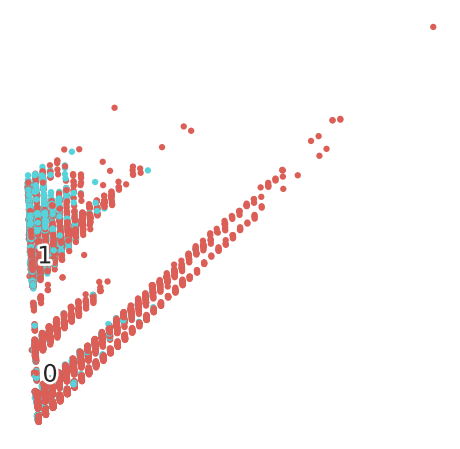

In [98]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values, y_raw.yes) 

In [100]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(X_raw)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 347.3970572948456 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(3.2508702, -1.017762, '0'), Text(-19.017382, 11.056693, '1')])

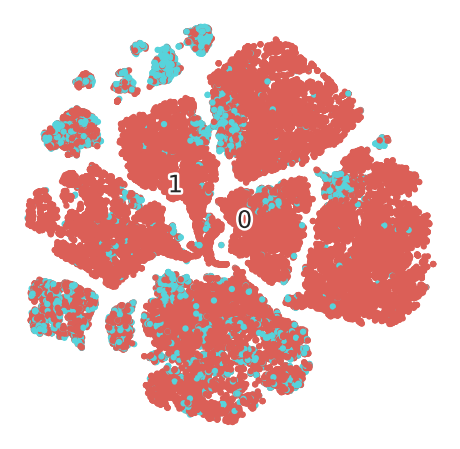

In [101]:
fashion_scatter(fashion_tsne, y_raw.yes)

# K-fold

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pca = PCA(n_components=7)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

model_log = LogisticRegression(solver='liblinear', random_state=0)

X2 = X_raw.values
y2 = y_raw.values.ravel()

# score = np.array([0,0,0])

for train_ix, test_ix in kfold.split(X2, y2):
    
    train_X, test_X = X2[train_ix], X2[test_ix]
    train_y, test_y = y2[train_ix], y2[test_ix]
    
    train_X = pca.fit_transform(train_X)
    test_X = pca.fit_transform(test_X)
    
    #logistic regression
    model_log.fit(train_X, train_y)
    
    y_pred=model_log.predict(test_X)
    
#     print(metrics.confusion_matrix(test_y, y_pred))
    print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
    print("Precision:",metrics.precision_score(test_y, y_pred))
    print("Recall:",metrics.recall_score(test_y, y_pred))
    print("F1 Score:",metrics.f1_score(test_y, y_pred))
    print('\n')

 

# for train_ix, test_ix in kfold.split(X2, y2):
# 	# select rows
# 	train_X, test_X = X2[train_ix], X2[test_ix]
# 	train_y, test_y = y2[train_ix], y2[test_ix]
    
# 	# summarize train and test composition
# 	train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
# 	test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
# 	print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))